In [230]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Punto 1

Considere la ecuación siguiente
$$f(x) = x^3 -3x + 1 = 0$$

A partir de la ecuación anterior, construya un sistema de orden 3 en la forma \(x=F(x)\). Aplique el método de aproximaciones sucesivas para encontrar una solución. Verifique las condiciones teóricas que permiten obtener una aproximación a una solución.

In [231]:
def F(x):
    return (3*x - 1)**(1/3)

def punto_fijo(initial_guess, tolerance, max_iterations):
    x_prev = initial_guess
    for i in range(max_iterations):
        x_next = F(x_prev)
        if abs(x_next - x_prev) < tolerance:
            return x_next, i + 1
        x_prev = x_next
    return None, max_iterations

initial_guess = 1.0  # Puedes ajustar este valor inicial si es necesario
tolerance = 1e-6
max_iterations = 1000

root, iterations = punto_fijo(initial_guess, tolerance, max_iterations)

if root is not None:
    print(f"Raíz aproximada: {root}")
    print(f"Iteraciones necesarias: {iterations}")
else:
    print("El método no convergió después de alcanzar el número máximo de iteraciones.")

Raíz aproximada: 1.532088514860452
Iteraciones necesarias: 17


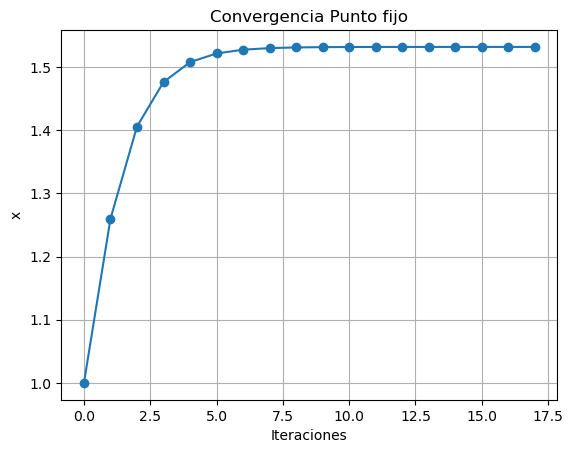

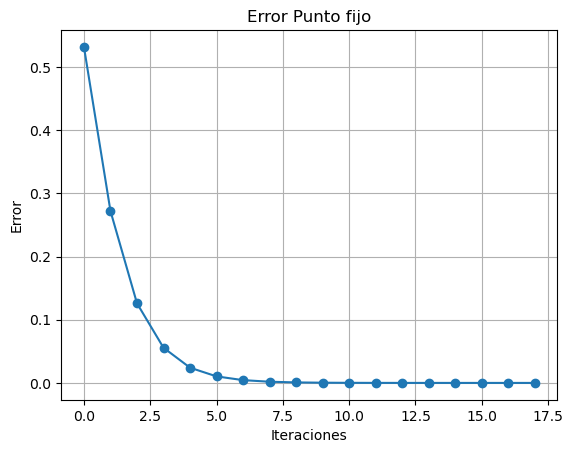

In [246]:
# define other punto_fijo function but store in array all the values of x
def punto_fijo2(x0, tol, nmax):
    x = np.zeros(nmax)
    x[0] = x0
    for i in range(1, nmax):
        x[i] = F(x[i-1])
        if abs(x[i] - x[i-1]) < tol:
            break
    return x[:i+1]

x_array = punto_fijo2(initial_guess, tolerance, max_iterations)
# plot the values of x
plt.plot(x_array, 'o-')
plt.xlabel('Iteraciones')
plt.ylabel('x')
plt.title('Convergencia Punto fijo')
plt.grid()
plt.show()

# plot the error
plt.plot(abs(x_array - x_array[-1]), 'o-')
plt.xlabel('Iteraciones')
plt.ylabel('Error')
plt.title('Error Punto fijo')
plt.grid()
plt.show()


Use el método de aproximaciones sucesivas para encontrar una solución cercana a $(x_1,x_2) = (1,1)$  del sistema siguiente:


\begin{cases}
2x_{1}^2 + x_{2}^2 &= 4.32 \\ 
x_{1}^2 - x_{2}^2 &= 0 
\end{cases}


Verifique las condiciones teóricas que permiten obtener una aproximación a una solución.

In [278]:
def F1(x2):
    return np.sqrt((4.32 -x2**2)/2)

def F2(x1):
    return np.sqrt(x1**2)

def punto_fijo_system(x1, x2, tolerance, max_iterations):
    for i in range(max_iterations):
        x1_next = F1(x2)
        x2_next = F2(x1)
        if abs(x1_next - x1) < tolerance and abs(x2_next - x2) < tolerance:
            return x1_next, x2_next, i + 1
        x1, x2 = x1_next, x2_next
    return None, None, max_iterations

initial_x1 = 1
initial_x2 = 1
tolerance = 5e-6
max_iterations = 1000

x1_approx, x2_approx, iterations = punto_fijo_system(initial_x1, initial_x2, tolerance, max_iterations)

if x1_approx is not None and x2_approx is not None:
    print(f"Aproximación de x1: {x1_approx}")
    print(f"Aproximación de x2: {x2_approx}")
    print(f"Iteraciones necesarias: {iterations}")
else:
    print("El método no convergió después de alcanzar el número máximo de iteraciones.")


Aproximación de x1: 1.2000013987215157
Aproximación de x2: 1.1999972025520778
Iteraciones necesarias: 33


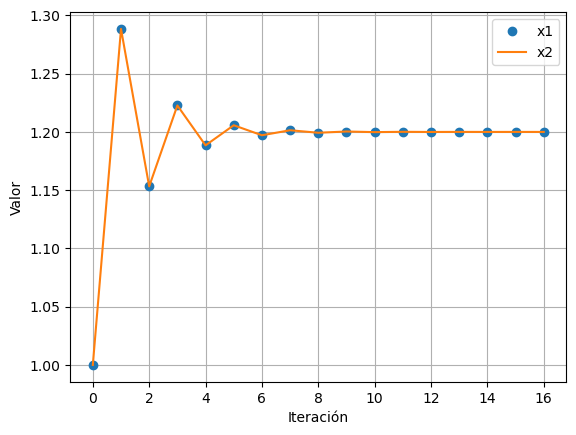

In [279]:
def punto_fijo_system2(x1,x2,tolerance,max_iterations):
    x_values = []
    y_values = []
    x_values.append(x1)
    y_values.append(x2)
    iteration_counter = 0
    while True:
        x1 = F1(x2)
        x2 = F2(x1)
        x_values.append(x1)
        y_values.append(x2)
        iteration_counter += 1
        if iteration_counter >= max_iterations:
            print("No converge")
            break
        if abs(x_values[-1] - x_values[-2]) < tolerance and abs(y_values[-1] - y_values[-2]) < tolerance:
            break
    return x_values,y_values,iteration_counter


x_values,y_values,iteration_counter = punto_fijo_system2(1,1,1e-5,100)
# plot x
plt.plot(x_values,'o',label='x1')
# plot y
plt.plot(y_values,'-',label='x2')
plt.grid(True)
plt.legend(loc='best')
plt.xlabel('Iteración')
plt.ylabel('Valor')
plt.show()




## Punto 2

Un oscilador amortiguado esta modelado por la ecuación diferencial

$$y'' + 10y' + 500y = 0$$

con condiciones iniciales:

$$y(0) = -0.025$$
$$y'(0) = -1$$

Esta ecuación tiene como solución exacta:

$$y(t) = e^{-5t} \left(-0.025 \cos(5 \sqrt{19} t) - 0.0516185 \sin(5 \sqrt{19} t)\right)$$




 Estimar $y(0.053)$ usando el método de Euler progresivo, Euler retrógrado y Euler modificado con $h=0.025$, y usar el método de Runge-Kutta de cuarto orden con $h=0.05$. Para ello, determine la solución exacta de la ecuación diferencial planteada y realice un cuadro comparativo (o curvas de error si es de su preferencia) entre los métodos implementados.

### Solución exacta

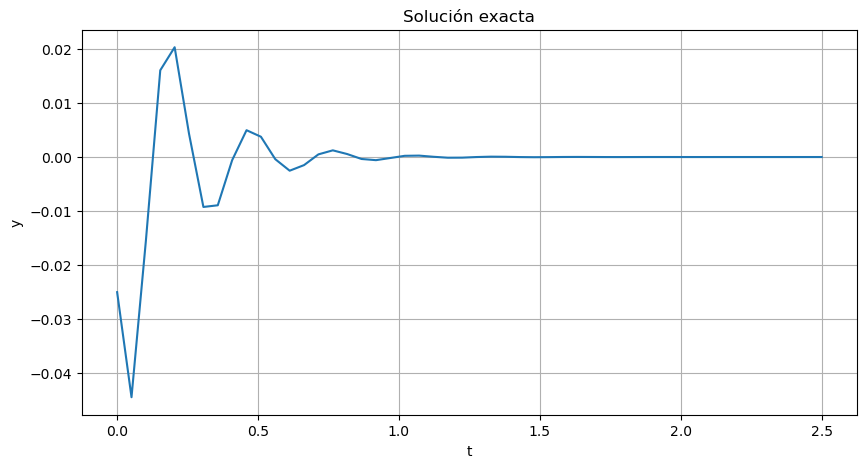

In [233]:
h = 0.025

time = np.linspace(0, 2.5)
def y_analytic(t):
    return np.exp(-5*t) * (-0.025*np.cos(5*np.sqrt(19)*t) - 0.0516185*np.sin(5*np.sqrt(19)*t))
y = y_analytic(time)

plt.figure(figsize=(10, 5))
plt.xlabel('t')
plt.ylabel('y')
plt.grid(True)
plt.title('Solución exacta')
plt.plot(time, y, label='Exact')
plt.show()

### Solución Euler explícito - Euler hacia adelante

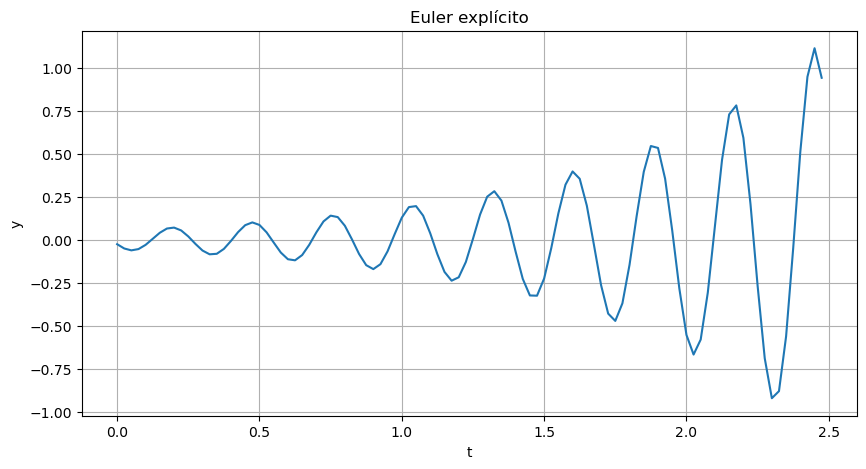

In [234]:
A = np.array([[0, 1], [-500, -10]])
y0 = np.array([-0.025, -1])

def forward_euler(A, y0, t, h):
    y = np.zeros((len(y0), len(t)))
    y[:,0] = y0
    for i in range(1, len(t)):
        y[:,i] = y[:,i-1] + h*A@y[:,i-1]
    return y

t = np.arange(0, 2.5, 0.025)
y_forward = forward_euler(A, y0,t, 0.025)

plt.figure(figsize=(10,5))
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Euler explícito')
plt.plot(t, y_forward[0,:], label='y1');


### Solución Euler implícito - Euler hacia atrás

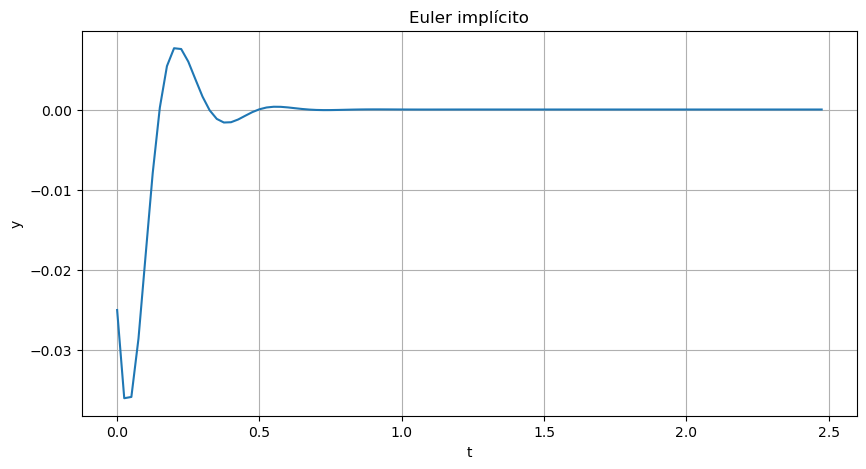

In [235]:
A = np.array([[0, 1], [-500, -10]])
y0 = np.array([-0.025, -1])

def backward_euler(A,y0,t,h):
    y = np.zeros((len(t), len(y0)))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = np.linalg.solve(np.eye(len(A)) - h*A, y[i-1])
    return y

t = np.arange(0, 2.5, 0.025)
y_backward = backward_euler(A, y0, t, 0.025)

plt.figure(figsize=(10,5))
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Euler implícito')
plt.plot(t, y_backward[:,0], label='y1');


### Solución Euler modificado - Euler mejorado

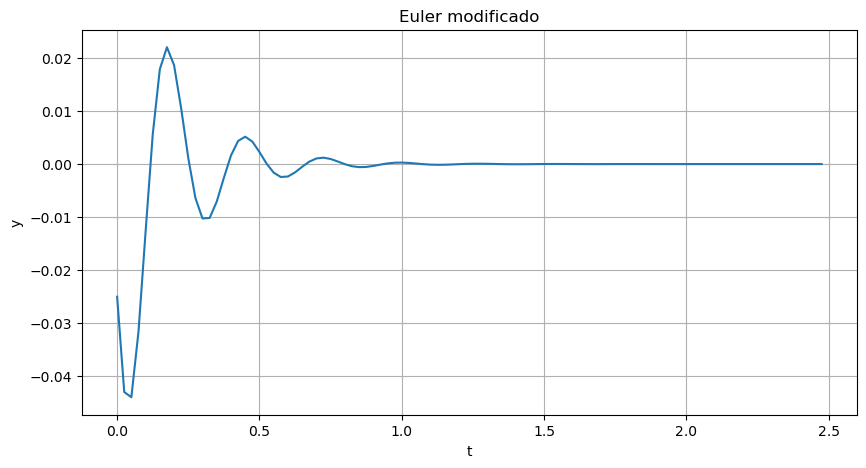

In [236]:
A = np.array([[0, 1], [-500, -10]])
y0 = np.array([-0.025, -1])

def modified_euler(A,y0,t,h):
    y = np.zeros((len(t),len(y0)))
    y[0] = y0
    for i in range(1,len(t)):
        y[i] = y[i-1] + h/2*(A@y[i-1] + A@(y[i-1] + h*A@y[i-1]))
    return y


t = np.arange(0, 2.5, 0.025)
y_modified = modified_euler(A, y0, t, 0.025)

plt.figure(figsize=(10,5))
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.title('Euler modificado')
plt.plot(t, y_modified[:,0], label='y1');

### Solución con el método Runge-Kuta de orden 4

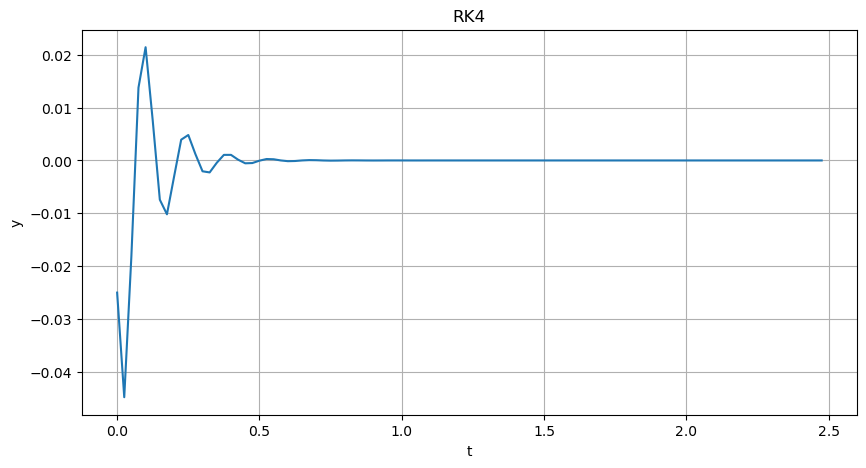

In [237]:
A = np.array([[0, 1], [-500, -10]])
y0 = np.array([-0.025, -1])

h_rk = 0.05

def rk4(A,y0,t,h):
    y = np.zeros((len(t),len(y0)))
    y[0] = y0
    for i in range(len(t)-1):
        k1 = h*A@y[i]
        k2 = h*A@(y[i]+k1/2)
        k3 = h*A@(y[i]+k2/2)
        k4 = h*A@(y[i]+k3)
        y[i+1] = y[i] + (k1+2*k2+2*k3+k4)/6
    return y

t = np.arange(0, 2.5, 0.025)
y_rk4 = rk4(A,y0,t,h_rk)

plt.figure(figsize=(10,5))
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y')
plt.title('RK4')
plt.plot(t, y_rk4[:,0], label='y1');



#### Solución en y(0.053)

In [238]:
t = np.arange(0, 2.5, 0.025)
t_rk = np.arange(0, 2.5, 0.05)

y_exact = y_analytic(t)
y_forward = forward_euler(A, y0, t,h)
y_backward = backward_euler(A, y0, t,h)  
y_modified = modified_euler(A, y0, t,h)
y_runge = rk4(A, y0, t_rk,h_rk)

# Obtener los valores a comparar de cada método
y_exact053 = y_exact[2:10:2]
y_forward053 = y_forward[0,:][2:10:2]
y_backward053 = y_backward[:,0][2:10:2]
y_modified053 = y_modified[:,0][2:10:2]
y_runge053 = y_runge[:,0][1:5]

# Crear una tabla con los resultados
table = pd.DataFrame({'t': t[2:10:2], 'Exacta': y_exact053, 'Euler explícito': y_forward053, 'Euler implícito': y_backward053, 'Euler modificado': y_modified053, 'Runge-Kutta 4': y_runge053})
table = table.round(4)
table

,t,Exacta,Euler explícito,Euler implícito,Euler modificado,Runge-Kutta 4
0,0.05,-0.0446,-0.0609,-0.0358,-0.0439,-0.0448
1,0.10,-0.0170,-0.0289,-0.0182,-0.0127,-0.0182
2,0.15,0.0148,0.0417,0.0002,0.0179,0.0138
3,0.20,0.0210,0.0717,0.0076,0.0186,0.0214


### Curvas de error

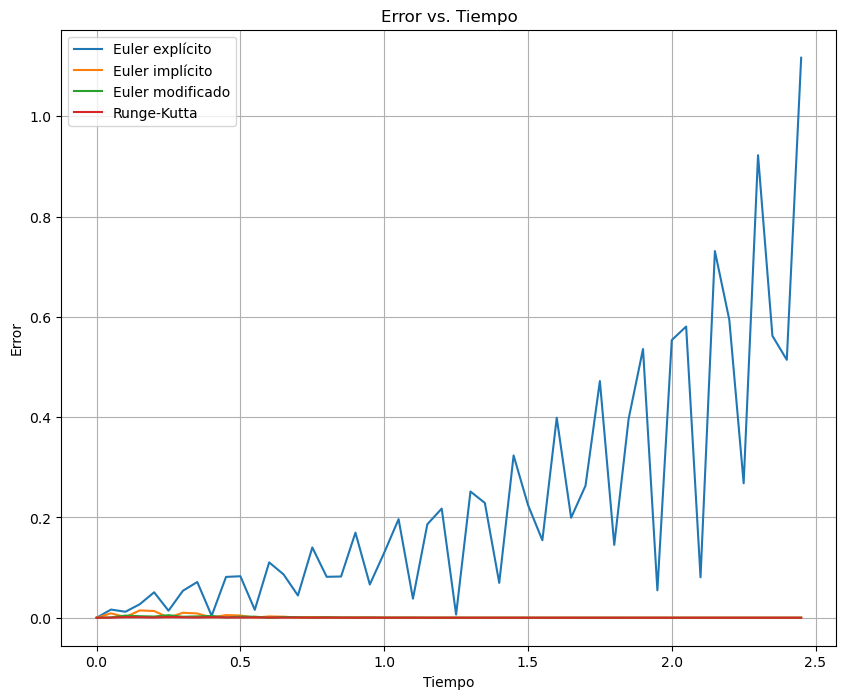

In [239]:
y_exact053 = y_exact[::2]
y_forward053 = y_forward[0,:][::2]
y_backward053 = y_backward[:,0][::2]
y_modified053 = y_modified[:,0][::2]
y_runge053 = y_runge[:,0]

# calculate error for each method
error_forward053 = np.abs(y_exact053 - y_forward053)
error_backward053 = np.abs(y_exact053 - y_backward053)
error_modified053 = np.abs(y_exact053 - y_modified053)
error_runge053 = np.abs(y_exact053 - y_runge053)

# plot error vs. time step
plt.figure(figsize=(10,8))
plt.plot(t_rk, error_forward053, label='Euler explícito')
plt.plot(t_rk, error_backward053, label='Euler implícito')
plt.plot(t_rk, error_modified053, label='Euler modificado')
plt.plot(t_rk, error_runge053, label='Runge-Kutta')
plt.xlabel('Tiempo')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.title('Error vs. Tiempo')
plt.show()


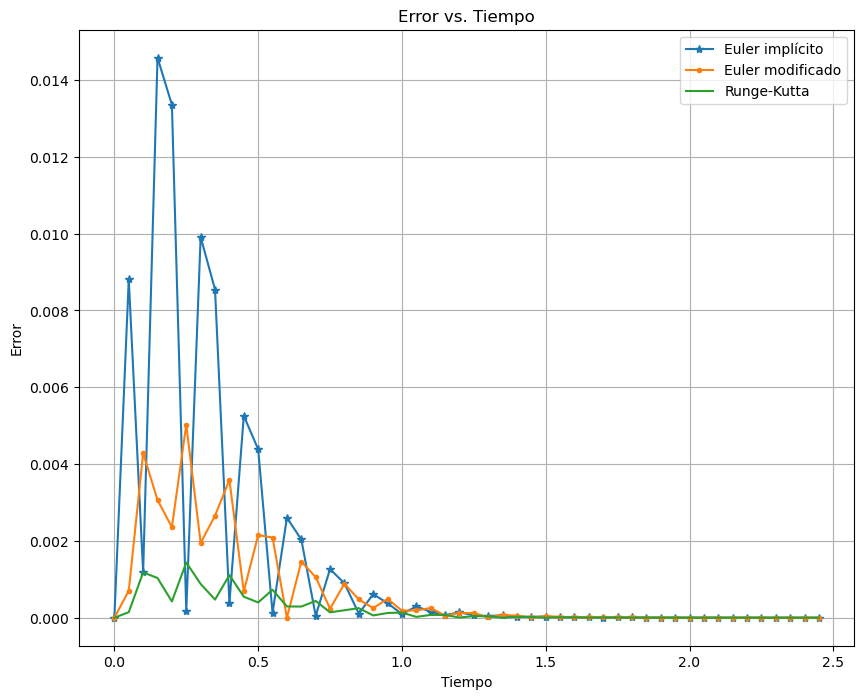

In [240]:
# plot error vs. time step
plt.figure(figsize=(10,8))
plt.plot(t_rk, error_backward053, label='Euler implícito',marker='*')
plt.plot(t_rk, error_modified053, label='Euler modificado',marker='.')
plt.plot(t_rk, error_runge053, label='Runge-Kutta')
plt.xlabel('Tiempo')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.title('Error vs. Tiempo')
plt.show()

### Excata vs RK4

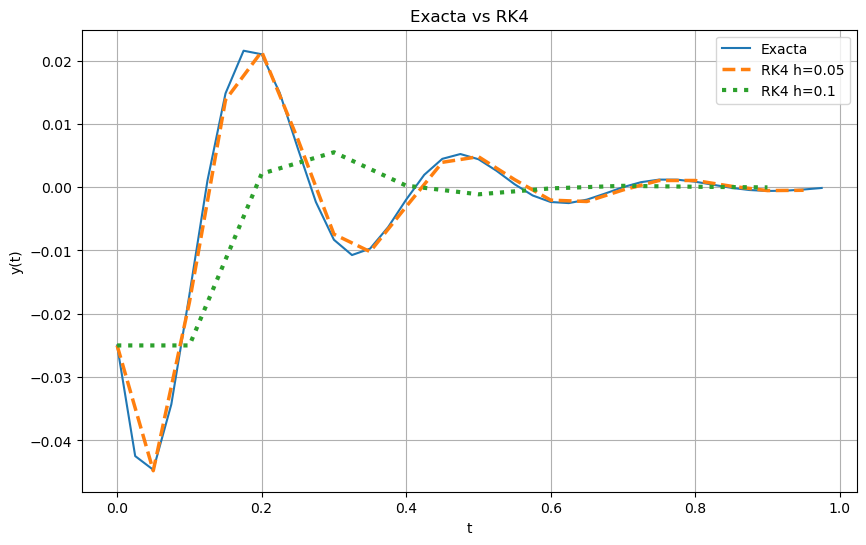

In [241]:
h_rk_1 = 0.05
h_rk_2 = 0.1

t = np.arange(0, 1, 0.025)
t_rk1 = np.arange(0, 1, h_rk_1)
t_rk2 = np.arange(0, 1, h_rk_2)

y_exact = y_analytic(t)
y_runge1 = rk4(A, y0, t_rk1,h_rk_1)
y_runge_2 = rk4(A, y0, t_rk2,h_rk_2)

# plot the results
plt.figure(figsize=(10, 6))
plt.plot(t, y_exact, label='Exacta')
plt.plot(t_rk1, y_runge1[:,0], label='RK4 h=0.05', linewidth=2.5,linestyle='dashed')
plt.plot(t_rk2, y_runge_2[:,0], label='RK4 h=0.1', linewidth=3, linestyle='dotted')
plt.legend()
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)
plt.title('Exacta vs RK4')
plt.show()


### Gráfica de todas las soluciones

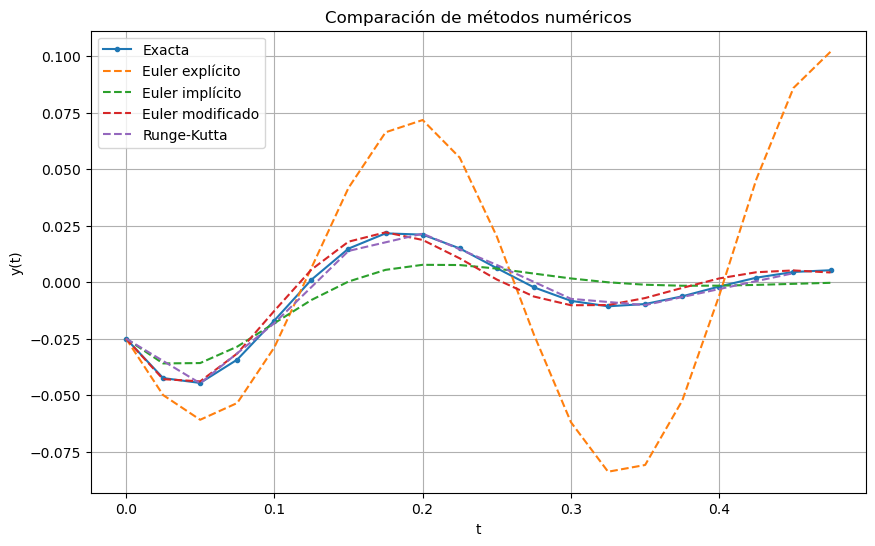

In [242]:
h = 0.025
h_rk = 0.05
t = np.arange(0, 0.5, h)
t_rk = np.arange(0, 0.5, h_rk)

y_exact = y_analytic(t)
y_forward = forward_euler(A,y0,t,h)
y_backward = backward_euler(A,y0,t,h)
y_modified = modified_euler(A,y0,t,h)
y_rk = rk4(A,y0,t_rk,h_rk)

plt.figure(figsize=(10,6))
plt.plot(t, y_exact, label='Exacta', marker='.', linestyle='solid')
plt.plot(t, y_forward[0,:], label='Euler explícito', linestyle='--')
plt.plot(t, y_backward[:,0], label='Euler implícito', linestyle='--')
plt.plot(t, y_modified[:,0], label='Euler modificado', linestyle='--')
plt.plot(t_rk, y_rk[:,0], label='Runge-Kutta', linestyle='--')

# beautify the previous plots
plt.legend()
plt.grid(True)
plt.xlabel('t')
plt.ylabel('y(t)')
plt.title('Comparación de métodos numéricos')
plt.show()

